# Analyzing outliers from data & Returning Dates

In [81]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import numpy as np
import os
import time



##### ETF Data Clean up ###########

class ETFDataCleanup(object):
    
    def __init__(self):
        pass

    def showNaColumns(self,df):
        s=df.isnull().sum()
        print(s[s>0])
    
    def dropNAColumns(self,df):
        return df.dropna(axis='columns')
    
    def computeDailyReturns(self,df):
        return df.pct_change().dropna()        
    
    
####### Get Data for Constituents of ETF

class ConstituentsData(ETFDataCleanup):
    
    def __init__(self,fileName=None,startdate=None,enddate=None):
        self.fileName=fileName
        self.startdate=startdate
        self.enddate=enddate
        self.constituentdata=[]
        self.constituentcloseDF=[]
        self.tickerdf=[]
        self.changeDF=[]
        self.waDF=[]
    
    def getconstituentdata(self):
        self.tickerdf = pd.read_excel(self.fileName)
        tickers=self.tickerdf['Ticker']
        self.tickerdf.set_index('Ticker',inplace=True)
        self.constituentdata =  web.DataReader(tickers,'yahoo',self.startdate,self.enddate)
        self.constituentcloseDF = self.constituentdata['Close'].iloc[:, :]
        
    def stringWeightsToFloat(self):
        self.tickerdf['Weights']=self.tickerdf['Weights'].apply(lambda x: x.replace('%','')).astype(float)
    
    def findNetAssetValue(self):
        self.waDF=self.changeDF
        for col in self.changeDF.columns:
            self.waDF[col]=self.changeDF[col]*self.tickerdf['Weights'].loc[col]
        self.waDF['NAV']=self.waDF.sum(axis=1)/100

####### Get prices of ETF        
class ETFStockPrices(ETFDataCleanup):
    
    def __init__(self,etfticker=None,startdate=None,enddate=None):
        self.etfticker=etfticker
        self.startdate=startdate
        self.enddate=enddate
        self.etfdata=[]
        self.etfchangeDF=[]

        
    def getETFTickerData(self):
        self.etfdata =  web.DataReader(self.etfticker,'yahoo',self.startdate,self.enddate)
 


class ETFArbitrage(object):

    def __init__(self,etfob,waDF):
        self.navDF=pd.merge(etfob,waDF['NAV'],left_index=True,right_index=True)
        self.navDF['Date']=self.navDF.index
        self.difDF=[]
    
    def scatterplot(self):
        plt.scatter(self.navDF['Close'],self.navDF['NAV'])
        
    def scatterplot2(self):
        #change figure size for the plot
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0]=12
        fig_size[1]=6
        plt.rcParams["figure.figsize"]=fig_size

        self.difDF=(self.navDF['Close']-self.navDF['NAV'])*100
        plt.scatter(self.navDF['Date'],self.difDF)
    
    def seaborndist(self):
        sns.distplot(self.difDF.values, hist=True, kde=True, 
             bins='auto', color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

# Load any ETF you want

XLK
Tickers with NA Values
Symbols
NLOK    64
dtype: int64
***************
Check for NA Values again
Series([], dtype: int64)
***************
Data for Constituents
Symbols         AAPL       ACN      ADBE       ADI       ADP       ADS  \
Date                                                                     
2019-01-03 -2.009081 -0.068625 -0.101904 -0.039867 -0.035030 -0.001771   
2019-01-04  0.861043  0.078156  0.125472  0.016024  0.046231  0.004738   
2019-01-07 -0.044895  0.006982  0.035017  0.004150 -0.006276 -0.000004   
2019-01-08  0.384503  0.050832  0.038487  0.016101  0.006843  0.001217   
2019-01-09  0.342522  0.010109  0.030493  0.016725  0.001060  0.001532   

Symbols         ADSK      AKAM      AMAT       AMD  ...       TEL       TXN  \
Date                                                ...                       
2019-01-03 -0.036388 -0.005106 -0.050412 -0.080351  ... -0.018674 -0.109100   
2019-01-04  0.034828  0.006697  0.059581  0.097214  ...  0.013116  0.083675   
2

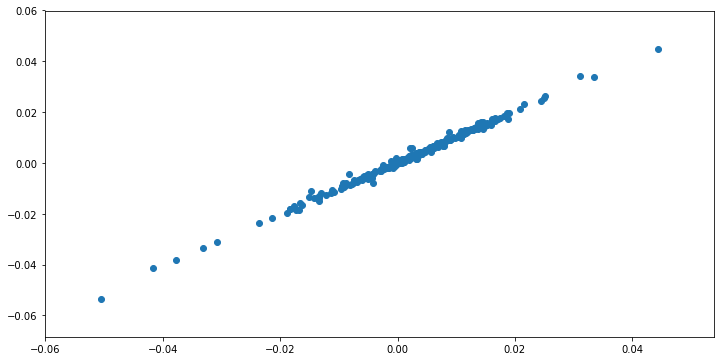

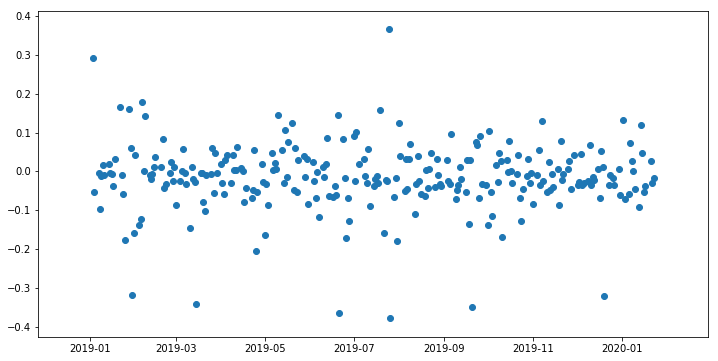

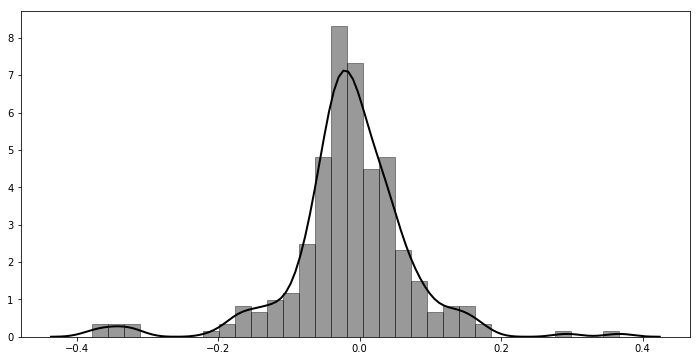

In [112]:
tickeretf="XLK"

filename='ETFDailyData'+'/'+dt.datetime.now().strftime("%Y%m%d")+'/'+tickeretf+'.xls'
startdate=dt.datetime(2019,1,1)
enddate=dt.datetime(2020,1,22)

ob=ConstituentsData(fileName=filename,startdate=startdate,enddate=enddate)
ob.getconstituentdata()
print(tickeretf)
print("Tickers with NA Values")
ob.showNaColumns(ob.constituentcloseDF)
ob.constituentcloseDF=ob.dropNAColumns(ob.constituentcloseDF)
print("***************")
print("Check for NA Values again")
ob.showNaColumns(ob.constituentcloseDF)
ob.changeDF=ob.computeDailyReturns(ob.constituentcloseDF)
ob.stringWeightsToFloat()
ob.findNetAssetValue()

print("***************")
print("Data for Constituents")
print(ob.waDF.head(5))

etfob=ETFStockPrices(etfticker=tickeretf,startdate=dt.datetime(2019,1,1),enddate=dt.datetime(2020,1,22))
etfob.getETFTickerData()
print("Show Any Empty Values")
etfob.showNaColumns(etfob.etfdata)
etfob.etfchangeDF=etfob.computeDailyReturns(etfob.etfdata['Close'])

print("***************")
print("Data for ETF stock prices")
print(etfob.etfchangeDF.head(5))

print("****************")
print("Charts")
arbob=ETFArbitrage(etfob.etfchangeDF,ob.waDF)
arbob.scatterplot()
plt.show()
arbob.scatterplot2()
plt.show()
arbob.seaborndist()
plt.show()

# List down all objects of 3 different classes

In [113]:
print("Constituents Data Objects")
print(dir(ob))

print("*************************")
print("ETF Price Object")
print(dir(etfob))

print("*************************")
print("Arbitrage Data Object")
print(dir(arbob))

Constituents Data Objects
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'changeDF', 'computeDailyReturns', 'constituentcloseDF', 'constituentdata', 'dropNAColumns', 'enddate', 'fileName', 'findNetAssetValue', 'getconstituentdata', 'showNaColumns', 'startdate', 'stringWeightsToFloat', 'tickerdf', 'waDF']
*************************
ETF Price Object
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'compute

In [114]:
print(arbob.difDF.head(5))

print(arbob.navDF.head(5))

Date
2019-01-03    0.292910
2019-01-04   -0.052035
2019-01-07   -0.004636
2019-01-08   -0.096958
2019-01-09   -0.013189
dtype: float64
               Close       NAV       Date
Date                                     
2019-01-03 -0.050468 -0.053397 2019-01-03
2019-01-04  0.044320  0.044840 2019-01-04
2019-01-07  0.008943  0.008989 2019-01-07
2019-01-08  0.008380  0.009350 2019-01-08
2019-01-09  0.012946  0.013077 2019-01-09


# Detecting & removing outliers from the dataset

## Z-Score Method

In [133]:
# Store a copy of the df
temp=arbob.difDF.copy()

# Convert the time series into a dataframe
temp=pd.DataFrame(temp)
temp.columns=['Mispricing']

# Calculate Z-Score for the Mispricing Column
temp['Z-Score'] = np.abs(stats.zscore(temp['Mispricing']))

# Define a thresold and find anything above 3 Std
thresoldStandrdDeviation=3
temp[temp['Z-Score']>thresoldStandrdDeviation]

,Mispricing,Z-Score
Date,,
2019-01-03,0.292910,3.531426
2019-01-30,-0.318511,3.497754
2019-03-15,-0.340703,3.752894
2019-06-21,-0.365862,4.042131
2019-07-25,0.366746,4.380276
2019-07-26,-0.378896,4.191971
2019-09-20,-0.350222,3.862321
2019-12-20,-0.322425,3.542752


In [135]:
# Find the biggest market movers(Stocks with greatest movement) that day and news, what was the possible 
# reasoning for falling stocks


